## Import modules

In [1]:
! pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 3.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 100.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.18.0
    Uninstalling plotly-5.18.0:
      Successfully uninstalled plotly-5.18.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.22
    Uninstalling botocore-

In [2]:
import sdv

In [3]:
sdv.version.public

'1.13.1'

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [5]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

In [6]:
from sdv.evaluation.single_table import get_column_plot
from plotly.subplots import make_subplots

In [7]:
from sklearn.utils import shuffle

## Load the data

In [8]:
# Specify the path to your CSV file
csv_file_path = '/kaggle/input/actual-motor-vehicle-insurance-portfolio/Dataset of an actual motor vehicle insurance portfolio/Motor vehicle insurance data.csv'

# Define the delimiter used in your CSV file
delimiter = ';'

# Specify the data types for each column to avoid mixed type warning
# You may need to adjust the data types based on your actual data
dtype_dict = {
    'ID': int,
    'Date_start_contract': str,
    'Date_last_renewal': str,
    'Date_next_renewal': str,
    'Date_birth': str,
    'Date_driving_licence': str,
    'Distribution_channel': str,
    'Seniority': str,
    'Policies_in_force': int,
    'Max_policies': int,
    'Max_products': int,
    'Lapse': str,
    'Date_lapse': str,
    'Payment': str,
    'Premium': float,
    'Cost_claims_year': float,
    'N_claims_year': int,
    'N_claims_history': int,
    'R_Claims_history': float,
    'Type_risk': str,
    'Area': str,
    'Second_driver': str,
    'Year_matriculation': int,
    'Power': int,
    'Cylinder_capacity': int,
    'Value_vehicle': float,
    'N_doors': int,
    'Type_fuel': str,
    'Length': float,
    'Weight': float
}

# Read the CSV file into a pandas DataFrame with specified data types
df = pd.read_csv(csv_file_path, delimiter=delimiter, dtype=dtype_dict)

# Display the first few rows of the DataFrame
df.head().style.set_properties(**{"background-color": "#457B9D","color":"#A8DADC","border": "1.5px solid Yellow"})

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,1,0,nan,0,222.520000,0.000000,0,0,0.000000,1,0,0,2004,80,599,7068.000000,0,P,nan,190.000000
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,1,0,nan,0,213.780000,0.000000,0,0,0.000000,1,0,0,2004,80,599,7068.000000,0,P,nan,190.000000
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,1,0,nan,0,214.840000,0.000000,0,0,0.000000,1,0,0,2004,80,599,7068.000000,0,P,nan,190.000000
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,1,0,nan,0,216.990000,0.000000,0,0,0.000000,1,0,0,2004,80,599,7068.000000,0,P,nan,190.000000
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,1,0,nan,1,213.700000,0.000000,0,0,0.000000,1,0,0,2004,80,599,7068.000000,0,P,nan,190.000000


## Data information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  object 
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  object 
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  object 
 14  Premium               105555 non-null  float64
 15  

<Axes: xlabel='Premium', ylabel='Density'>

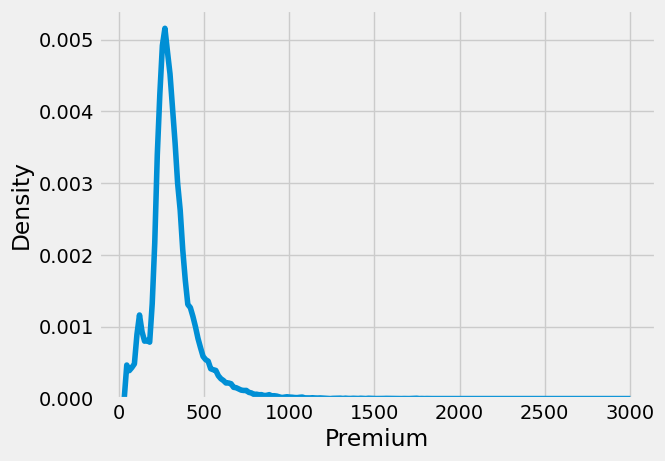

In [10]:
sns.kdeplot(df.Premium, bw_adjust=.25)

<Axes: xlabel='Premium'>

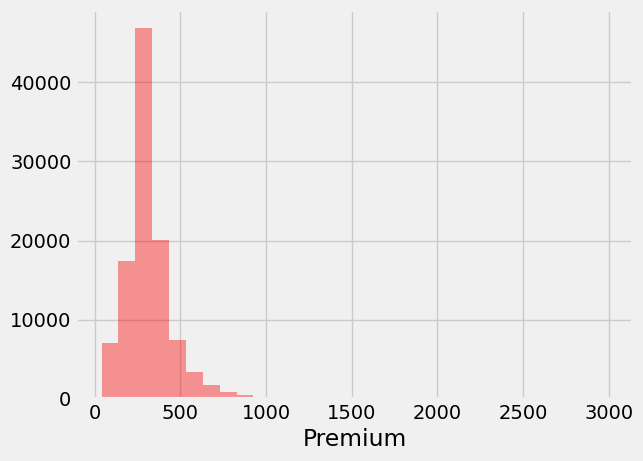

In [11]:
sns.distplot(df['Premium'], kde = False, color ='red', bins = 30)

## Data pre-processing

### Removing missing values

In [12]:
df.isnull().sum()

ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                  10329
Weight                      0
dtype: int64

In [ ]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(20,15))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=11, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(df, fontsize=11, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(df,fontsize=11,ax=axs[2]);
msno.dendrogram(df,fontsize=11,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)

# Save the plot
plt.savefig('missing_values_analysis.png')

# Show the plot
plt.show()

In [ ]:
# summary table function
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

In [15]:
summary(df).style.background_gradient(cmap='magma')

data shape: (105555, 30)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
ID,int64,0,0.000000,53502,1.000000,53502.000000,1,1,1
Date_start_contract,object,0,0.000000,5518,nan,nan,05/11/2015,05/11/2015,05/11/2015
Date_last_renewal,object,0,0.000000,1124,nan,nan,05/11/2015,05/11/2016,05/11/2017
Date_next_renewal,object,0,0.000000,1124,nan,nan,05/11/2016,05/11/2017,05/11/2018
Date_birth,object,0,0.000000,17048,nan,nan,15/04/1956,15/04/1956,15/04/1956
Date_driving_licence,object,0,0.000000,14016,nan,nan,20/03/1976,20/03/1976,20/03/1976
Distribution_channel,object,0,0.000000,3,nan,nan,0,0,0
Seniority,object,0,0.000000,40,nan,nan,4,4,4
Policies_in_force,int64,0,0.000000,17,1.000000,17.000000,1,1,2
Max_policies,int64,0,0.000000,17,1.000000,17.000000,2,2,2


### Encoding categorical features

In [16]:
df_number=df.select_dtypes(include=[np.number])

In [17]:
df_number.shape

(105555, 16)

In [18]:
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105555 non-null  int64  
 1   Policies_in_force   105555 non-null  int64  
 2   Max_policies        105555 non-null  int64  
 3   Max_products        105555 non-null  int64  
 4   Premium             105555 non-null  float64
 5   Cost_claims_year    105555 non-null  float64
 6   N_claims_year       105555 non-null  int64  
 7   N_claims_history    105555 non-null  int64  
 8   R_Claims_history    105555 non-null  float64
 9   Year_matriculation  105555 non-null  int64  
 10  Power               105555 non-null  int64  
 11  Cylinder_capacity   105555 non-null  int64  
 12  Value_vehicle       105555 non-null  float64
 13  N_doors             105555 non-null  int64  
 14  Length              95226 non-null   float64
 15  Weight              105555 non-nul

In [19]:
df_cat=df.select_dtypes(include=[object])

In [20]:
df_cat.shape

(105555, 14)

In [21]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Date_start_contract   105555 non-null  object
 1   Date_last_renewal     105555 non-null  object
 2   Date_next_renewal     105555 non-null  object
 3   Date_birth            105555 non-null  object
 4   Date_driving_licence  105555 non-null  object
 5   Distribution_channel  105555 non-null  object
 6   Seniority             105555 non-null  object
 7   Lapse                 105555 non-null  object
 8   Date_lapse            35147 non-null   object
 9   Payment               105555 non-null  object
 10  Type_risk             105555 non-null  object
 11  Area                  105555 non-null  object
 12  Second_driver         105555 non-null  object
 13  Type_fuel             103791 non-null  object
dtypes: object(14)
memory usage: 11.3+ MB


In [22]:
df_number.isnull().sum()/len(df)*100

ID                    0.00000
Policies_in_force     0.00000
Max_policies          0.00000
Max_products          0.00000
Premium               0.00000
Cost_claims_year      0.00000
N_claims_year         0.00000
N_claims_history      0.00000
R_Claims_history      0.00000
Year_matriculation    0.00000
Power                 0.00000
Cylinder_capacity     0.00000
Value_vehicle         0.00000
N_doors               0.00000
Length                9.78542
Weight                0.00000
dtype: float64

In [23]:
df_cat.isnull().sum()/len(df)*100

Date_start_contract      0.000000
Date_last_renewal        0.000000
Date_next_renewal        0.000000
Date_birth               0.000000
Date_driving_licence     0.000000
Distribution_channel     0.000000
Seniority                0.000000
Lapse                    0.000000
Date_lapse              66.702667
Payment                  0.000000
Type_risk                0.000000
Area                     0.000000
Second_driver            0.000000
Type_fuel                1.671167
dtype: float64

In [24]:
df['Length'] = df['Length'].fillna(df['Length'].median())

In [25]:
df.isnull().sum()

ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                      0
Weight                      0
dtype: int64

In [26]:
df['Type_fuel'].value_counts()

Type_fuel
D    64998
P    38793
Name: count, dtype: int64

In [27]:
df['Type_fuel'].fillna('D', inplace=True) 

In [28]:
df.isnull().sum()

ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                   0
Length                      0
Weight                      0
dtype: int64

In [29]:
df_number = df.select_dtypes(include=[np.number])

In [30]:
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105555 non-null  int64  
 1   Policies_in_force   105555 non-null  int64  
 2   Max_policies        105555 non-null  int64  
 3   Max_products        105555 non-null  int64  
 4   Premium             105555 non-null  float64
 5   Cost_claims_year    105555 non-null  float64
 6   N_claims_year       105555 non-null  int64  
 7   N_claims_history    105555 non-null  int64  
 8   R_Claims_history    105555 non-null  float64
 9   Year_matriculation  105555 non-null  int64  
 10  Power               105555 non-null  int64  
 11  Cylinder_capacity   105555 non-null  int64  
 12  Value_vehicle       105555 non-null  float64
 13  N_doors             105555 non-null  int64  
 14  Length              105555 non-null  float64
 15  Weight              105555 non-nul

In [31]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Date_start_contract   105555 non-null  object
 1   Date_last_renewal     105555 non-null  object
 2   Date_next_renewal     105555 non-null  object
 3   Date_birth            105555 non-null  object
 4   Date_driving_licence  105555 non-null  object
 5   Distribution_channel  105555 non-null  object
 6   Seniority             105555 non-null  object
 7   Lapse                 105555 non-null  object
 8   Date_lapse            35147 non-null   object
 9   Payment               105555 non-null  object
 10  Type_risk             105555 non-null  object
 11  Area                  105555 non-null  object
 12  Second_driver         105555 non-null  object
 13  Type_fuel             103791 non-null  object
dtypes: object(14)
memory usage: 11.3+ MB


In [32]:
df['Seniority'] = df['Seniority'].astype(int)

In [33]:
df['Payment'] = pd.get_dummies(df['Payment'], drop_first=True)

In [34]:
df['Payment'] = df['Payment'].astype(int)

In [35]:
df['Lapse'] = df['Lapse'].astype(int)

In [36]:
df = pd.get_dummies(df, columns = ['Type_risk'], drop_first=True, dtype=int)

In [37]:
df['Area'] = pd.get_dummies(df['Area'], drop_first=True, dtype=int)

In [38]:
df['Second_driver'] = pd.get_dummies(df['Second_driver'], drop_first=True, dtype=int)

In [39]:
df['Type_fuel'] = pd.get_dummies(df['Type_fuel'], drop_first=True, dtype=int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

In [41]:
df_cat = df.select_dtypes([object])

In [42]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Date_start_contract   105555 non-null  object
 1   Date_last_renewal     105555 non-null  object
 2   Date_next_renewal     105555 non-null  object
 3   Date_birth            105555 non-null  object
 4   Date_driving_licence  105555 non-null  object
 5   Distribution_channel  105555 non-null  object
 6   Date_lapse            35147 non-null   object
dtypes: object(7)
memory usage: 5.6+ MB


In [43]:
df['Distribution_channel'].value_counts()

Distribution_channel
0             54501
1             47638
00/01/1900     3416
Name: count, dtype: int64

In [44]:
df['Distribution_channel'] = df['Distribution_channel'].replace('00/01/1900','0')

In [45]:
df['Distribution_channel'].value_counts()

Distribution_channel
0    57917
1    47638
Name: count, dtype: int64

In [46]:
df['Distribution_channel'] = pd.get_dummies(df['Distribution_channel'], drop_first=True, dtype=int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  int64  
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

### Date time conversion

In [48]:
df['Date_birth'] = pd.DatetimeIndex(df['Date_birth'])
df['Date_start_contract'] = pd.DatetimeIndex(df['Date_start_contract'])
df['Date_last_renewal'] = pd.DatetimeIndex(df['Date_last_renewal'])
df['Date_driving_licence'] = pd.DatetimeIndex(df['Date_driving_licence'])
df['Date_lapse'] = pd.DatetimeIndex(df['Date_lapse'])
df['Date_next_renewal'] = pd.DatetimeIndex(df['Date_next_renewal'])

### Removing datetime cols

In [49]:
df['Date_birth'].head()

0   1956-04-15
1   1956-04-15
2   1956-04-15
3   1956-04-15
4   1956-04-15
Name: Date_birth, dtype: datetime64[ns]

In [50]:
df['Age'] = (pd.to_datetime('2019-12-31' , format = '%Y-%m-%d') - df['Date_birth'])

In [51]:
df['Age'] = round(df['Age'].dt.days/365)

In [52]:
df.drop(columns = 'Date_birth', inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    105555 non-null  int64         
 1   Date_start_contract   105555 non-null  datetime64[ns]
 2   Date_last_renewal     105555 non-null  datetime64[ns]
 3   Date_next_renewal     105555 non-null  datetime64[ns]
 4   Date_driving_licence  105555 non-null  datetime64[ns]
 5   Distribution_channel  105555 non-null  int64         
 6   Seniority             105555 non-null  int64         
 7   Policies_in_force     105555 non-null  int64         
 8   Max_policies          105555 non-null  int64         
 9   Max_products          105555 non-null  int64         
 10  Lapse                 105555 non-null  int64         
 11  Date_lapse            35147 non-null   datetime64[ns]
 12  Payment               105555 non-null  int64         
 13 

In [54]:
df['Length_of_lapse'] = (pd.to_datetime('2019-12-31' , format = '%Y-%m-%d') - df['Date_lapse'])

In [55]:
df['Length_of_lapse'] = df['Length_of_lapse'].dt.days

In [56]:
df['Length_of_lapse'].fillna(0, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    105555 non-null  int64         
 1   Date_start_contract   105555 non-null  datetime64[ns]
 2   Date_last_renewal     105555 non-null  datetime64[ns]
 3   Date_next_renewal     105555 non-null  datetime64[ns]
 4   Date_driving_licence  105555 non-null  datetime64[ns]
 5   Distribution_channel  105555 non-null  int64         
 6   Seniority             105555 non-null  int64         
 7   Policies_in_force     105555 non-null  int64         
 8   Max_policies          105555 non-null  int64         
 9   Max_products          105555 non-null  int64         
 10  Lapse                 105555 non-null  int64         
 11  Date_lapse            35147 non-null   datetime64[ns]
 12  Payment               105555 non-null  int64         
 13 

In [58]:
df['Driving_experience'] = (pd.to_datetime('2019-12-31' , format = '%Y-%m-%d') - df['Date_driving_licence'])

In [59]:
df['Driving_experience'] = df['Driving_experience'].dt.days

In [60]:
df['Driving_experience'] = round(df['Driving_experience']/365, 2)

In [61]:
df.drop(columns = 'Date_driving_licence', inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    105555 non-null  int64         
 1   Date_start_contract   105555 non-null  datetime64[ns]
 2   Date_last_renewal     105555 non-null  datetime64[ns]
 3   Date_next_renewal     105555 non-null  datetime64[ns]
 4   Distribution_channel  105555 non-null  int64         
 5   Seniority             105555 non-null  int64         
 6   Policies_in_force     105555 non-null  int64         
 7   Max_policies          105555 non-null  int64         
 8   Max_products          105555 non-null  int64         
 9   Lapse                 105555 non-null  int64         
 10  Date_lapse            35147 non-null   datetime64[ns]
 11  Payment               105555 non-null  int64         
 12  Premium               105555 non-null  float64       
 13 

In [63]:
df['Policy_term'] = (df['Date_lapse'] - df['Date_start_contract']) 

In [64]:
df['Policy_term'] = df['Policy_term'].dt.days

In [65]:
df['Policy_term'].fillna((pd.to_datetime('2019-12-31' , format = '%Y-%m-%d') - df['Date_start_contract']).dt.days, inplace=True)

In [66]:
df['Policy_term'] = round(df['Policy_term']/365, 2)

In [67]:
df['Years_of_coverage'] = (df['Date_last_renewal'] - df['Date_start_contract'])

In [68]:
df['Years_of_coverage'] = df['Years_of_coverage'].dt.days

In [69]:
df['Years_of_coverage'] = round(df['Years_of_coverage']/365, 2)

In [70]:
df.drop(columns = 'Date_lapse', inplace=True)

In [71]:
df.drop(columns = 'Date_start_contract', inplace=True)

In [72]:
df.drop(columns = 'Date_last_renewal', inplace=True)

In [73]:
df.drop(columns = 'Date_next_renewal', inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Distribution_channel  105555 non-null  int64  
 2   Seniority             105555 non-null  int64  
 3   Policies_in_force     105555 non-null  int64  
 4   Max_policies          105555 non-null  int64  
 5   Max_products          105555 non-null  int64  
 6   Lapse                 105555 non-null  int64  
 7   Payment               105555 non-null  int64  
 8   Premium               105555 non-null  float64
 9   Cost_claims_year      105555 non-null  float64
 10  N_claims_year         105555 non-null  int64  
 11  N_claims_history      105555 non-null  int64  
 12  R_Claims_history      105555 non-null  float64
 13  Area                  105555 non-null  int64  
 14  Second_driver         105555 non-null  int64  
 15  

In [75]:
df['Cost_each_claim']  = df['Cost_claims_year']/df['N_claims_year']

In [76]:
df['Cost_each_claim'].fillna(0, inplace=True)

### Feature selection

In [77]:
df

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Weight,Type_risk_2,Type_risk_3,Type_risk_4,Age,Length_of_lapse,Driving_experience,Policy_term,Years_of_coverage,Cost_each_claim
0,1,0,4,1,2,1,0,0,222.52,0.0,...,190.0,0,0,0,64.0,0.0,43.81,4.64,0.0,0.0
1,1,0,4,1,2,1,0,0,213.78,0.0,...,190.0,0,0,0,64.0,0.0,43.81,4.64,1.0,0.0
2,1,0,4,2,2,1,0,0,214.84,0.0,...,190.0,0,0,0,64.0,0.0,43.81,4.64,2.0,0.0
3,1,0,4,2,2,1,0,0,216.99,0.0,...,190.0,0,0,0,64.0,0.0,43.81,4.64,3.0,0.0
4,2,0,4,2,2,1,0,1,213.70,0.0,...,190.0,0,0,0,64.0,0.0,43.81,2.26,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105550,53498,0,1,1,1,1,0,0,263.79,0.0,...,1480.0,0,1,0,38.0,0.0,12.88,1.42,0.0,0.0
105551,53499,0,1,1,1,1,0,0,418.97,0.0,...,1440.0,0,1,0,43.0,0.0,2.09,1.38,0.0,0.0
105552,53500,0,1,1,1,1,0,1,571.91,0.0,...,830.0,0,1,0,46.0,0.0,8.65,1.11,0.0,0.0
105553,53501,0,1,1,1,1,0,0,339.66,0.0,...,1399.0,1,0,0,73.0,0.0,37.93,1.11,0.0,0.0


In [78]:
import statsmodels.api as sm

def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        model = sm.OLS(target, features_with_constant).fit()
        p_values = model.pvalues[1:]  # Exclude constant
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

# Example usage:
# selected_features = backward_elimination(data, target)

In [79]:
def backward_elimination(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [80]:
features = backward_elimination(df, df['Premium'])

In [81]:
features = list((feature_names)[sorted_idx])[:5]

NameError: name 'feature_names' is not defined

In [87]:
df.columns

Index(['ID', 'Distribution_channel', 'Seniority', 'Policies_in_force',
       'Max_policies', 'Max_products', 'Lapse', 'Payment', 'Premium',
       'Cost_claims_year', 'N_claims_year', 'N_claims_history',
       'R_Claims_history', 'Area', 'Second_driver', 'Year_matriculation',
       'Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel',
       'Length', 'Weight', 'Type_risk_2', 'Type_risk_3', 'Type_risk_4', 'Age',
       'Length_of_lapse', 'Driving_experience', 'Policy_term',
       'Years_of_coverage', 'Cost_each_claim'],
      dtype='object')

In [88]:
features = ['ID','Distribution_channel','Cost_claims_year','R_Claims_history','Area','Year_matriculation','Policy_term','Power','Cylinder_capacity','Value_vehicle','Type_risk_2','Type_risk_3','Type_risk_4','Driving_experience','Seniority','Lapse','Length_of_lapse','Premium']

In [89]:
df_final = df[features]

In [90]:
df_final

,ID,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse,Premium
0,1,0,0.0,0.0,0,2004,4.64,80,599,7068.00,0,0,0,43.81,4,0,0.0,222.52
1,1,0,0.0,0.0,0,2004,4.64,80,599,7068.00,0,0,0,43.81,4,0,0.0,213.78
2,1,0,0.0,0.0,0,2004,4.64,80,599,7068.00,0,0,0,43.81,4,0,0.0,214.84
3,1,0,0.0,0.0,0,2004,4.64,80,599,7068.00,0,0,0,43.81,4,0,0.0,216.99
4,2,0,0.0,0.0,0,2004,2.26,80,599,7068.00,0,0,0,43.81,4,0,0.0,213.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105550,53498,0,0.0,0.0,0,2000,1.42,110,1997,24320.00,0,1,0,12.88,1,0,0.0,263.79
105551,53499,0,0.0,0.0,0,2013,1.38,129,1998,30861.97,0,1,0,2.09,1,0,0.0,418.97
105552,53500,0,0.0,0.0,0,1999,1.11,55,999,7800.00,0,1,0,8.65,1,0,0.0,571.91
105553,53501,0,0.0,0.0,0,2004,1.11,90,1753,16610.00,1,0,0,37.93,1,0,0.0,339.66


### Groupby

In [91]:
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+""+col for col in cols]
        grouped.columns=cols
        return grouped
    
    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+""+col+"" for col in concat.columns ]
        concat.columns=cols
        
        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+""+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)
        
        return concat

In [ ]:
# cols=['Distribution_channel','Max_products','Premium','Year_matriculation','Value_vehicle', 'Length_of_lapse']

In [92]:
cols = df_final.drop(columns=['ID']).columns

In [93]:
cols

Index(['Distribution_channel', 'Cost_claims_year', 'R_Claims_history', 'Area',
       'Year_matriculation', 'Policy_term', 'Power', 'Cylinder_capacity',
       'Value_vehicle', 'Type_risk_2', 'Type_risk_3', 'Type_risk_4',
       'Driving_experience', 'Seniority', 'Lapse', 'Length_of_lapse',
       'Premium'],
      dtype='object')

In [94]:
ID = groupby(df_final,["ID"],cols,["mean"],"",
                       True,False)

In [95]:
ID

,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse,Premium
0,0.0,0.0,0.0,0.0,2004.0,4.64,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0,217.0325
1,0.0,0.0,0.0,0.0,2004.0,4.64,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0,217.0325
2,0.0,0.0,0.0,0.0,2004.0,4.64,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0,217.0325
3,0.0,0.0,0.0,0.0,2004.0,4.64,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0,217.0325
4,0.0,0.0,0.0,0.0,2004.0,2.26,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0,214.7650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105550,0.0,0.0,0.0,0.0,2000.0,1.42,110.0,1997.0,24320.00,0.0,1.0,0.0,12.88,1.0,0.0,0.0,263.7900
105551,0.0,0.0,0.0,0.0,2013.0,1.38,129.0,1998.0,30861.97,0.0,1.0,0.0,2.09,1.0,0.0,0.0,418.9700
105552,0.0,0.0,0.0,0.0,1999.0,1.11,55.0,999.0,7800.00,0.0,1.0,0.0,8.65,1.0,0.0,0.0,571.9100
105553,0.0,0.0,0.0,0.0,2004.0,1.11,90.0,1753.0,16610.00,1.0,0.0,0.0,37.93,1.0,0.0,0.0,339.6600


In [96]:
selected_cols_names=['ID']
selected_cols=df_final[selected_cols_names]
data=pd.concat([selected_cols,ID],axis=1)
grouped=data.groupby(by=["ID","Premium"]).agg("mean").reset_index()

In [97]:
grouped

,ID,Premium,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,1,217.0325,0.0,0.0,0.0,0.0,2004.0,4.64,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0
1,2,214.7650,0.0,0.0,0.0,0.0,2004.0,2.26,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0
2,3,390.6675,0.0,0.0,0.0,0.0,2013.0,6.09,85.0,1229.0,16030.00,0.0,1.0,0.0,24.25,15.0,0.0,0.0
3,4,117.7900,0.0,0.0,0.0,0.0,1986.0,3.19,6.0,74.0,1261.82,0.0,0.0,0.0,26.67,3.0,0.0,0.0
4,5,80.6500,0.0,0.0,0.0,0.0,1986.0,2.07,6.0,244.0,3000.00,0.0,0.0,0.0,26.67,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53497,53498,263.7900,0.0,0.0,0.0,0.0,2000.0,1.42,110.0,1997.0,24320.00,0.0,1.0,0.0,12.88,1.0,0.0,0.0
53498,53499,418.9700,0.0,0.0,0.0,0.0,2013.0,1.38,129.0,1998.0,30861.97,0.0,1.0,0.0,2.09,1.0,0.0,0.0
53499,53500,571.9100,0.0,0.0,0.0,0.0,1999.0,1.11,55.0,999.0,7800.00,0.0,1.0,0.0,8.65,1.0,0.0,0.0
53500,53501,339.6600,0.0,0.0,0.0,0.0,2004.0,1.11,90.0,1753.0,16610.00,1.0,0.0,0.0,37.93,1.0,0.0,0.0


In [98]:
grouped=grouped.fillna(0)

In [99]:
grouped.isnull().sum()

ID                      0
Premium                 0
Distribution_channel    0
Cost_claims_year        0
R_Claims_history        0
Area                    0
Year_matriculation      0
Policy_term             0
Power                   0
Cylinder_capacity       0
Value_vehicle           0
Type_risk_2             0
Type_risk_3             0
Type_risk_4             0
Driving_experience      0
Seniority               0
Lapse                   0
Length_of_lapse         0
dtype: int64

In [100]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53502 entries, 0 to 53501
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    53502 non-null  int64  
 1   Premium               53502 non-null  float64
 2   Distribution_channel  53502 non-null  float64
 3   Cost_claims_year      53502 non-null  float64
 4   R_Claims_history      53502 non-null  float64
 5   Area                  53502 non-null  float64
 6   Year_matriculation    53502 non-null  float64
 7   Policy_term           53502 non-null  float64
 8   Power                 53502 non-null  float64
 9   Cylinder_capacity     53502 non-null  float64
 10  Value_vehicle         53502 non-null  float64
 11  Type_risk_2           53502 non-null  float64
 12  Type_risk_3           53502 non-null  float64
 13  Type_risk_4           53502 non-null  float64
 14  Driving_experience    53502 non-null  float64
 15  Seniority          

In [101]:
df_final=grouped

In [102]:
df_final

,ID,Premium,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,1,217.0325,0.0,0.0,0.0,0.0,2004.0,4.64,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0
1,2,214.7650,0.0,0.0,0.0,0.0,2004.0,2.26,80.0,599.0,7068.00,0.0,0.0,0.0,43.81,4.0,0.0,0.0
2,3,390.6675,0.0,0.0,0.0,0.0,2013.0,6.09,85.0,1229.0,16030.00,0.0,1.0,0.0,24.25,15.0,0.0,0.0
3,4,117.7900,0.0,0.0,0.0,0.0,1986.0,3.19,6.0,74.0,1261.82,0.0,0.0,0.0,26.67,3.0,0.0,0.0
4,5,80.6500,0.0,0.0,0.0,0.0,1986.0,2.07,6.0,244.0,3000.00,0.0,0.0,0.0,26.67,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53497,53498,263.7900,0.0,0.0,0.0,0.0,2000.0,1.42,110.0,1997.0,24320.00,0.0,1.0,0.0,12.88,1.0,0.0,0.0
53498,53499,418.9700,0.0,0.0,0.0,0.0,2013.0,1.38,129.0,1998.0,30861.97,0.0,1.0,0.0,2.09,1.0,0.0,0.0
53499,53500,571.9100,0.0,0.0,0.0,0.0,1999.0,1.11,55.0,999.0,7800.00,0.0,1.0,0.0,8.65,1.0,0.0,0.0
53500,53501,339.6600,0.0,0.0,0.0,0.0,2004.0,1.11,90.0,1753.0,16610.00,1.0,0.0,0.0,37.93,1.0,0.0,0.0


In [103]:
df_final.describe()

,ID,Premium,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
count,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000
mean,26751.500000,316.409788,0.475048,174.438731,0.466334,0.272999,2004.764495,3.877517,93.302718,1618.951478,18557.606503,0.123397,0.789578,0.006691,26.639370,5.793241,0.284749,357.521270
std,15444.841388,139.876786,0.499382,1583.467812,0.821347,0.445505,6.801399,3.765975,37.268660,597.007180,9237.447966,0.328896,0.407612,0.081527,12.554199,5.907575,0.446080,501.429281
min,1.000000,40.180000,0.000000,0.000000,0.000000,0.000000,1950.000000,-0.740000,0.000000,49.000000,270.460000,0.000000,0.000000,0.000000,1.060000,1.000000,0.000000,0.000000
25%,13376.250000,241.082500,0.000000,0.000000,0.000000,0.000000,2001.000000,1.550000,75.000000,1390.000000,13200.000000,0.000000,1.000000,0.000000,16.170000,2.000000,0.000000,0.000000
50%,26751.500000,293.590000,0.000000,0.000000,0.000000,0.000000,2005.000000,2.510000,90.000000,1598.000000,17770.000000,0.000000,1.000000,0.000000,25.650000,4.000000,0.000000,0.000000
75%,40126.750000,364.388750,1.000000,41.380417,0.670000,1.000000,2008.000000,4.740000,110.000000,1910.000000,22780.000000,0.000000,1.000000,0.000000,36.000000,7.000000,0.500000,773.000000
max,53502.000000,2380.006667,1.000000,236285.180000,26.070000,1.000000,2018.000000,39.210000,580.000000,7480.000000,220675.800000,1.000000,1.000000,1.000000,78.020000,40.000000,7.000000,1814.000000


<Axes: xlabel='Premium', ylabel='Density'>

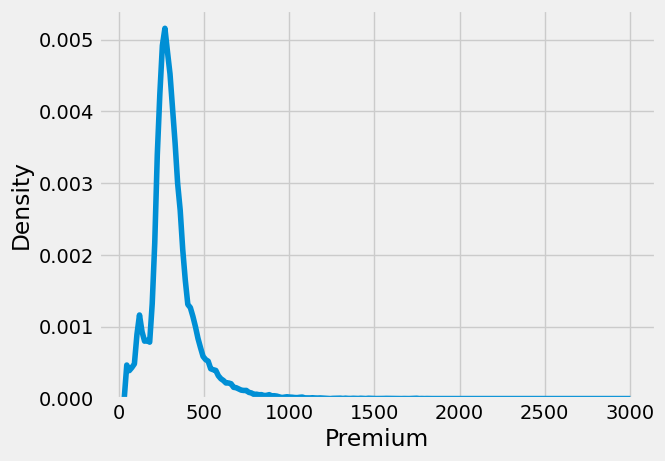

In [104]:
sns.kdeplot(df.Premium, bw_adjust=.25)

<Axes: xlabel='Premium'>

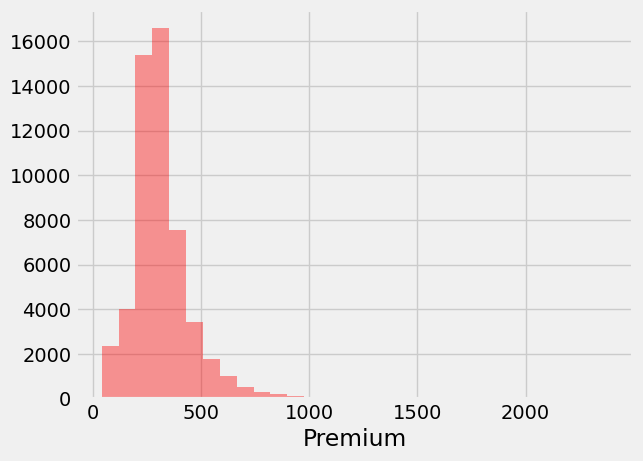

In [105]:
sns.distplot(df_final['Premium'], kde = False, color ='red', bins = 30)

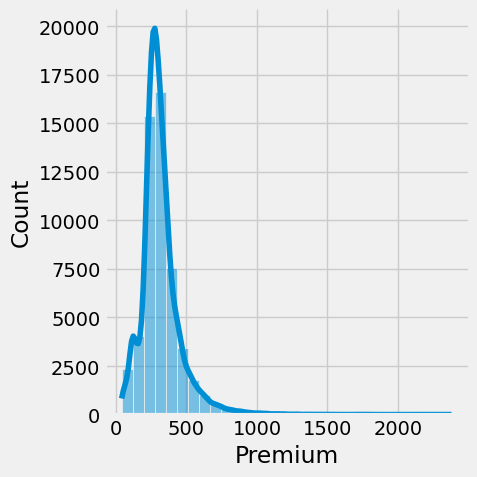

In [106]:
sns.displot(df_final, x="Premium", kde=True, bins=30)

## Synthetic data

In [107]:
metadata = SingleTableMetadata()

In [108]:
metadata.detect_from_dataframe(df_final)

In [109]:
python_dict = metadata.to_dict()

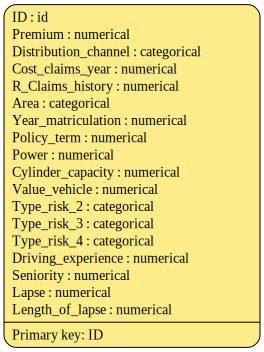

In [110]:
metadata.visualize()

In [111]:
metadata.validate_data(df_final)

In [112]:
# metadata.update_column(
#     column_name='Age',
#     sdtype='numerical',
#     computer_representation='UInt8')

In [113]:
# metadata.update_column(
#     column_name='Seniority',
#     sdtype='numerical',
#     computer_representation='UInt8')

In [194]:
# metadata.update_column(
#     column_name='Weight',
#     sdtype='numerical',
#     computer_representation='UInt16')

In [ ]:
metadata.update_column(
    column_name='Cylinder_capacity',
    sdtype='numerical',
    computer_representation='UInt16')

In [ ]:
metadata.validate_data(df_final)

In [ ]:
metadata.visualize()

In [ ]:
# metadata.save_to_json('metadata.json')

## CTGAN

In [119]:
synthesizer = CTGANSynthesizer(metadata,verbose=True,epochs=100)

In [120]:
synthesizer.fit(df_final)

Gen. (-0.60) | Discrim. (-0.11): 100%|██████████| 100/100 [06:15<00:00,  3.76s/it]


In [121]:
synthesizer.save(
    filepath='my_synthesizer1.pkl'
)

In [122]:
# synthesizer = CTGANSynthesizer.load(
#     filepath='my_synthesizer.pkl'
# )

In [123]:
synthesizer.get_transformers()

{'ID': AnonymizedFaker(function_name='bothify', function_kwargs={'text': '#########'}, cardinality_rule='unique'),
 'Premium': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'Distribution_channel': None,
 'Cost_claims_year': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'R_Claims_history': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'Area': None,
 'Year_matriculation': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'Policy_term': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'Power': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'Cylinder_capacity': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'Value_vehicle': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'Type_risk_2': None,
 'Type_risk_3': None,
 'Type_risk_4': None,
 'Driving_experience': FloatFormatter(learn_ro

In [124]:
loss = synthesizer.get_loss_values()

In [125]:
generator_losses = loss['Generator Loss']

In [126]:
discriminator_losses = loss['Discriminator Loss']

In [ ]:
# Plot the losses
plt.figure(figsize=(30, 5))
plt.plot(loss['Epoch'],generator_losses, label="Generator Loss")
plt.plot(loss['Epoch'],discriminator_losses, label="Discriminator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.xticks(np.arange(0, 1000, 50))
plt.legend()
plt.show()

In [128]:
loss.to_csv('out.csv', index=False) 

In [129]:
synthetic_data = synthesizer.sample(num_rows=10000,batch_size=100)

Sampling rows: 100%|██████████| 10000/10000 [00:13<00:00, 733.32it/s]


In [130]:
# synthetic_data = pd.read_csv('sdata1.csv')

In [131]:
synthetic_data

,ID,Premium,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,773153107,293.809737,0.0,0.494064,0.000082,0.0,1999.0,2.357140,57.0,1164.0,7999.504753,0.0,1.0,0.0,47.370431,2.0,0.502251,901.0
1,295010557,258.317470,1.0,0.000000,0.000000,0.0,2004.0,3.219273,106.0,1996.0,26605.885074,0.0,1.0,0.0,16.069194,18.0,1.992267,0.0
2,475410988,427.107393,1.0,442.816785,2.623217,0.0,2004.0,0.831362,105.0,1745.0,26377.667477,1.0,0.0,0.0,20.713925,3.0,0.000000,793.0
3,421328571,558.418323,0.0,53.407718,0.610573,0.0,2007.0,2.360978,107.0,2544.0,23532.862410,0.0,1.0,0.0,39.183239,4.0,0.501581,764.0
4,646285693,278.194033,1.0,2.382900,0.000000,1.0,2007.0,4.481866,132.0,1469.0,19716.179976,0.0,1.0,0.0,12.777744,6.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,820852371,184.460682,0.0,2.520065,0.000000,0.0,1999.0,0.926510,64.0,1279.0,7927.967506,1.0,0.0,0.0,12.501711,2.0,0.500352,1037.0
9996,989702258,286.632021,0.0,105.817753,0.555041,0.0,2006.0,3.812937,72.0,2378.0,25917.240794,1.0,0.0,0.0,20.129184,12.0,0.000000,0.0
9997,764234705,223.878589,1.0,0.000000,0.001341,0.0,2002.0,0.985659,56.0,1132.0,10182.511521,0.0,1.0,0.0,20.165479,2.0,0.995484,1402.0
9998,793482785,232.355632,0.0,83.160297,0.156619,0.0,2001.0,10.326724,103.0,1916.0,11009.027364,0.0,1.0,0.0,34.901005,9.0,0.000000,0.0


In [132]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 18/18 [00:00<00:00, 191.06it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 360.86it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [133]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df_final,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 18/18 [00:00<00:00, 80.49it/s]|
Column Shapes Score: 85.77%

(2/2) Evaluating Column Pair Trends: |██████████| 153/153 [00:09<00:00, 16.85it/s]|
Column Pair Trends Score: 80.57%

Overall Score (Average): 83.17%



In [134]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,Premium,KSComplement,0.832115
1,Distribution_channel,TVComplement,0.867548
2,Cost_claims_year,KSComplement,0.723480
3,R_Claims_history,KSComplement,0.677615
4,Area,TVComplement,0.835999
5,Year_matriculation,KSComplement,0.948365
6,Policy_term,KSComplement,0.930849
7,Power,KSComplement,0.868161
8,Cylinder_capacity,KSComplement,0.898972
9,Value_vehicle,KSComplement,0.907857


In [135]:
x=[]

In [136]:
x

[]

In [137]:
for i in (df_final.columns):
    x.append(i)

In [138]:
x.remove('ID')

In [139]:
# type(f)

In [140]:
# go.Figure(data=data).

In [141]:
ite = iter(x)

In [142]:
# fig = go.Figure()

f1 = get_column_plot(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name=next(ite)
)
f1.show()

In [143]:
# fig = go.Figure()

f1 = get_column_plot(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name=next(ite)
)
f1.show()

In [144]:
# fig = go.Figure()

f1 = get_column_plot(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name=next(ite)
)
f1.show()

In [145]:
# fig = go.Figure()

f1 = get_column_plot(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name=next(ite)
)
f1.show()

In [146]:
# fig = go.Figure()

f1 = get_column_plot(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name=next(ite)
)
f1.show()

In [147]:
# fig = go.Figure()

f1 = get_column_plot(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name=next(ite)
)
f1.show()

In [148]:
# from sdv.evaluation.single_table import get_column_plot

# fig = get_column_plot(
#         real_data=df_final,
#         synthetic_data=synthetic_data,
#         column_name=i,
#         metadata=metadata
#     )
#     fig.show()
    

In [149]:
def figures_to_html(figs, filename="dashboard.html"):
    with open(filename, 'w') as dashboard:
        dashboard.write("<html><head></head><body>" + "\n")
        for fig in figs:
            inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
            dashboard.write(inner_html)
        dashboard.write("</body></html>" + "\n")


# Example figures
import plotly.express as px
gapminder = px.data.gapminder().query("country=='Canada'")
fig1 = get_column_plot(
    real_data=df_final,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name='Premium'
)
gapminder = px.data.gapminder().query("continent=='Oceania'")
fig2 = px.line(gapminder, x="year", y="lifeExp", color='country')
gapminder = px.data.gapminder().query("continent != 'Asia'")
fig3 = px.line(gapminder, x="year", y="lifeExp", color="continent",
               line_group="country", hover_name="country")

figures_to_html([fig1, fig2, fig3])

# <-------------------------------------------------------------------------------------------------------->

### Scaling

#### Real data

In [150]:
# Seperating the target and independent variables

X = df_final.drop(columns=['ID'])

In [151]:
from sklearn.preprocessing import StandardScaler 
# initialize the standard scalar
ms = StandardScaler()

# standardize all the columns of the dataframe 
num_scaled = ms.fit_transform(X.drop(columns=['Distribution_channel','Premium']))

In [152]:
X = pd.DataFrame(num_scaled,columns = X.drop(columns=['Distribution_channel','Premium']).columns)
X

,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,-0.110164,-0.567773,-0.612792,-0.112404,0.202468,-0.356944,-1.708457,-1.243819,-0.375190,-1.937099,-0.082076,1.367733,-0.303552,-0.638344,-0.713011
1,-0.110164,-0.567773,-0.612792,-0.112404,-0.429512,-0.356944,-1.708457,-1.243819,-0.375190,-1.937099,-0.082076,1.367733,-0.303552,-0.638344,-0.713011
2,-0.110164,-0.567773,-0.612792,1.210866,0.587498,-0.222782,-0.653183,-0.273629,-0.375190,0.516236,-0.082076,-0.190326,1.558481,-0.638344,-0.713011
3,-0.110164,-0.567773,-0.612792,-2.758943,-0.182562,-2.342546,-2.587851,-1.872373,-0.375190,-1.937099,-0.082076,0.002440,-0.472828,-0.638344,-0.713011
4,-0.110164,-0.567773,-0.612792,-2.758943,-0.479964,-2.342546,-2.303095,-1.684205,-0.375190,-1.937099,-0.082076,0.002440,-0.472828,-0.638344,-0.713011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53497,-0.110164,-0.567773,-0.612792,-0.700523,-0.652564,0.448029,0.633245,0.623814,-0.375190,0.516236,-0.082076,-1.096008,-0.811380,-0.638344,-0.713011
53498,-0.110164,-0.567773,-0.612792,1.210866,-0.663186,0.957845,0.634920,1.332021,-0.375190,0.516236,-0.082076,-1.955489,-0.811380,-0.638344,-0.713011
53499,-0.110164,-0.567773,-0.612792,-0.847553,-0.734881,-1.027756,-1.038442,-1.164576,-0.375190,0.516236,-0.082076,-1.432950,-0.811380,-0.638344,-0.713011
53500,-0.110164,-0.567773,-0.612792,-0.112404,-0.734881,-0.088620,0.224536,-0.210840,2.665316,-1.937099,-0.082076,0.899359,-0.811380,-0.638344,-0.713011


In [153]:
X = pd.concat([df_final['Distribution_channel'],df_final['Premium'],X], axis=1)

In [154]:
X

,Distribution_channel,Premium,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,0.0,217.0325,-0.110164,-0.567773,-0.612792,-0.112404,0.202468,-0.356944,-1.708457,-1.243819,-0.375190,-1.937099,-0.082076,1.367733,-0.303552,-0.638344,-0.713011
1,0.0,214.7650,-0.110164,-0.567773,-0.612792,-0.112404,-0.429512,-0.356944,-1.708457,-1.243819,-0.375190,-1.937099,-0.082076,1.367733,-0.303552,-0.638344,-0.713011
2,0.0,390.6675,-0.110164,-0.567773,-0.612792,1.210866,0.587498,-0.222782,-0.653183,-0.273629,-0.375190,0.516236,-0.082076,-0.190326,1.558481,-0.638344,-0.713011
3,0.0,117.7900,-0.110164,-0.567773,-0.612792,-2.758943,-0.182562,-2.342546,-2.587851,-1.872373,-0.375190,-1.937099,-0.082076,0.002440,-0.472828,-0.638344,-0.713011
4,0.0,80.6500,-0.110164,-0.567773,-0.612792,-2.758943,-0.479964,-2.342546,-2.303095,-1.684205,-0.375190,-1.937099,-0.082076,0.002440,-0.472828,-0.638344,-0.713011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53497,0.0,263.7900,-0.110164,-0.567773,-0.612792,-0.700523,-0.652564,0.448029,0.633245,0.623814,-0.375190,0.516236,-0.082076,-1.096008,-0.811380,-0.638344,-0.713011
53498,0.0,418.9700,-0.110164,-0.567773,-0.612792,1.210866,-0.663186,0.957845,0.634920,1.332021,-0.375190,0.516236,-0.082076,-1.955489,-0.811380,-0.638344,-0.713011
53499,0.0,571.9100,-0.110164,-0.567773,-0.612792,-0.847553,-0.734881,-1.027756,-1.038442,-1.164576,-0.375190,0.516236,-0.082076,-1.432950,-0.811380,-0.638344,-0.713011
53500,0.0,339.6600,-0.110164,-0.567773,-0.612792,-0.112404,-0.734881,-0.088620,0.224536,-0.210840,2.665316,-1.937099,-0.082076,0.899359,-0.811380,-0.638344,-0.713011


In [155]:
y = X.Premium
X.drop(columns=['Premium'],inplace=True)

In [156]:
X

,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,0.0,-0.110164,-0.567773,-0.612792,-0.112404,0.202468,-0.356944,-1.708457,-1.243819,-0.375190,-1.937099,-0.082076,1.367733,-0.303552,-0.638344,-0.713011
1,0.0,-0.110164,-0.567773,-0.612792,-0.112404,-0.429512,-0.356944,-1.708457,-1.243819,-0.375190,-1.937099,-0.082076,1.367733,-0.303552,-0.638344,-0.713011
2,0.0,-0.110164,-0.567773,-0.612792,1.210866,0.587498,-0.222782,-0.653183,-0.273629,-0.375190,0.516236,-0.082076,-0.190326,1.558481,-0.638344,-0.713011
3,0.0,-0.110164,-0.567773,-0.612792,-2.758943,-0.182562,-2.342546,-2.587851,-1.872373,-0.375190,-1.937099,-0.082076,0.002440,-0.472828,-0.638344,-0.713011
4,0.0,-0.110164,-0.567773,-0.612792,-2.758943,-0.479964,-2.342546,-2.303095,-1.684205,-0.375190,-1.937099,-0.082076,0.002440,-0.472828,-0.638344,-0.713011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53497,0.0,-0.110164,-0.567773,-0.612792,-0.700523,-0.652564,0.448029,0.633245,0.623814,-0.375190,0.516236,-0.082076,-1.096008,-0.811380,-0.638344,-0.713011
53498,0.0,-0.110164,-0.567773,-0.612792,1.210866,-0.663186,0.957845,0.634920,1.332021,-0.375190,0.516236,-0.082076,-1.955489,-0.811380,-0.638344,-0.713011
53499,0.0,-0.110164,-0.567773,-0.612792,-0.847553,-0.734881,-1.027756,-1.038442,-1.164576,-0.375190,0.516236,-0.082076,-1.432950,-0.811380,-0.638344,-0.713011
53500,0.0,-0.110164,-0.567773,-0.612792,-0.112404,-0.734881,-0.088620,0.224536,-0.210840,2.665316,-1.937099,-0.082076,0.899359,-0.811380,-0.638344,-0.713011


In [157]:
y

0        217.0325
1        214.7650
2        390.6675
3        117.7900
4         80.6500
           ...   
53497    263.7900
53498    418.9700
53499    571.9100
53500    339.6600
53501    447.1200
Name: Premium, Length: 53502, dtype: float64

#### Synthetic data

In [158]:
# Seperating the target and independent variables

X1 = synthetic_data.drop(columns=['ID'])

In [159]:
from sklearn.preprocessing import StandardScaler 
# initialize the standard scalar
ms = StandardScaler()

# standardize all the columns of the dataframe 
num_scaled = ms.fit_transform(X1.drop(columns=['Distribution_channel','Premium']))

In [160]:
X1 = pd.DataFrame(num_scaled,columns = X1.drop(columns=['Distribution_channel','Premium']).columns)
X1

,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,-0.244377,-0.538267,-0.881022,-0.694526,-0.403777,-0.848276,-0.685314,-1.061725,-0.533251,0.789709,-0.284747,1.604128,-0.639248,0.673679,1.150572
1,-0.245482,-0.538375,-0.881022,-0.025632,-0.193112,0.461910,0.601439,0.781300,-0.533251,0.789709,-0.284747,-1.053261,1.664608,4.548724,-0.713016
2,0.744270,2.912380,-0.881022,-0.025632,-0.776607,0.435172,0.213248,0.758695,1.875290,-1.266289,-0.284747,-0.658936,-0.495257,-0.632511,0.927190
3,-0.126109,0.264813,-0.881022,0.375704,-0.402839,0.488649,1.448963,0.476907,-0.533251,0.789709,-0.284747,0.909058,-0.351266,0.671938,0.867207
4,-0.240156,-0.538375,1.135046,0.375704,0.115407,1.157111,-0.213608,0.098851,-0.533251,0.789709,-0.284747,-1.332696,-0.063284,-0.632511,-0.708879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.239849,-0.538375,-0.881022,-0.694526,-0.753357,-0.661107,-0.507457,-1.068811,1.875290,-1.266289,-0.284747,-1.356131,-0.639248,0.668742,1.431868
9996,-0.008966,0.191762,-0.881022,0.241925,-0.048048,-0.447199,1.192231,0.713088,1.875290,-1.266289,-0.284747,-0.708579,0.800662,-0.632511,-0.713016
9997,-0.245482,-0.536612,-0.881022,-0.293189,-0.738904,-0.875015,-0.734804,-0.845491,-0.533251,0.789709,-0.284747,-0.705498,-0.639248,1.956418,2.186818
9998,-0.059608,-0.332348,-0.881022,-0.426968,1.543620,0.381695,0.477713,-0.763622,-0.533251,0.789709,-0.284747,0.545508,0.368689,-0.632511,-0.713016


In [161]:
X1 = pd.concat([synthetic_data['Distribution_channel'],synthetic_data['Premium'],X1], axis=1)

In [162]:
X1

,Distribution_channel,Premium,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,0.0,293.809737,-0.244377,-0.538267,-0.881022,-0.694526,-0.403777,-0.848276,-0.685314,-1.061725,-0.533251,0.789709,-0.284747,1.604128,-0.639248,0.673679,1.150572
1,1.0,258.317470,-0.245482,-0.538375,-0.881022,-0.025632,-0.193112,0.461910,0.601439,0.781300,-0.533251,0.789709,-0.284747,-1.053261,1.664608,4.548724,-0.713016
2,1.0,427.107393,0.744270,2.912380,-0.881022,-0.025632,-0.776607,0.435172,0.213248,0.758695,1.875290,-1.266289,-0.284747,-0.658936,-0.495257,-0.632511,0.927190
3,0.0,558.418323,-0.126109,0.264813,-0.881022,0.375704,-0.402839,0.488649,1.448963,0.476907,-0.533251,0.789709,-0.284747,0.909058,-0.351266,0.671938,0.867207
4,1.0,278.194033,-0.240156,-0.538375,1.135046,0.375704,0.115407,1.157111,-0.213608,0.098851,-0.533251,0.789709,-0.284747,-1.332696,-0.063284,-0.632511,-0.708879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,184.460682,-0.239849,-0.538375,-0.881022,-0.694526,-0.753357,-0.661107,-0.507457,-1.068811,1.875290,-1.266289,-0.284747,-1.356131,-0.639248,0.668742,1.431868
9996,0.0,286.632021,-0.008966,0.191762,-0.881022,0.241925,-0.048048,-0.447199,1.192231,0.713088,1.875290,-1.266289,-0.284747,-0.708579,0.800662,-0.632511,-0.713016
9997,1.0,223.878589,-0.245482,-0.536612,-0.881022,-0.293189,-0.738904,-0.875015,-0.734804,-0.845491,-0.533251,0.789709,-0.284747,-0.705498,-0.639248,1.956418,2.186818
9998,0.0,232.355632,-0.059608,-0.332348,-0.881022,-0.426968,1.543620,0.381695,0.477713,-0.763622,-0.533251,0.789709,-0.284747,0.545508,0.368689,-0.632511,-0.713016


In [163]:
y1 = X1.Premium
X1.drop(columns=['Premium'],inplace=True)

In [164]:
X1

,Distribution_channel,Cost_claims_year,R_Claims_history,Area,Year_matriculation,Policy_term,Power,Cylinder_capacity,Value_vehicle,Type_risk_2,Type_risk_3,Type_risk_4,Driving_experience,Seniority,Lapse,Length_of_lapse
0,0.0,-0.244377,-0.538267,-0.881022,-0.694526,-0.403777,-0.848276,-0.685314,-1.061725,-0.533251,0.789709,-0.284747,1.604128,-0.639248,0.673679,1.150572
1,1.0,-0.245482,-0.538375,-0.881022,-0.025632,-0.193112,0.461910,0.601439,0.781300,-0.533251,0.789709,-0.284747,-1.053261,1.664608,4.548724,-0.713016
2,1.0,0.744270,2.912380,-0.881022,-0.025632,-0.776607,0.435172,0.213248,0.758695,1.875290,-1.266289,-0.284747,-0.658936,-0.495257,-0.632511,0.927190
3,0.0,-0.126109,0.264813,-0.881022,0.375704,-0.402839,0.488649,1.448963,0.476907,-0.533251,0.789709,-0.284747,0.909058,-0.351266,0.671938,0.867207
4,1.0,-0.240156,-0.538375,1.135046,0.375704,0.115407,1.157111,-0.213608,0.098851,-0.533251,0.789709,-0.284747,-1.332696,-0.063284,-0.632511,-0.708879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,-0.239849,-0.538375,-0.881022,-0.694526,-0.753357,-0.661107,-0.507457,-1.068811,1.875290,-1.266289,-0.284747,-1.356131,-0.639248,0.668742,1.431868
9996,0.0,-0.008966,0.191762,-0.881022,0.241925,-0.048048,-0.447199,1.192231,0.713088,1.875290,-1.266289,-0.284747,-0.708579,0.800662,-0.632511,-0.713016
9997,1.0,-0.245482,-0.536612,-0.881022,-0.293189,-0.738904,-0.875015,-0.734804,-0.845491,-0.533251,0.789709,-0.284747,-0.705498,-0.639248,1.956418,2.186818
9998,0.0,-0.059608,-0.332348,-0.881022,-0.426968,1.543620,0.381695,0.477713,-0.763622,-0.533251,0.789709,-0.284747,0.545508,0.368689,-0.632511,-0.713016


In [165]:
y1

0       293.809737
1       258.317470
2       427.107393
3       558.418323
4       278.194033
           ...    
9995    184.460682
9996    286.632021
9997    223.878589
9998    232.355632
9999    297.812427
Name: Premium, Length: 10000, dtype: float64

## Train-test split

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (42801, 16)
y_train (42801,)
X_test (10701, 16)
y_test (10701,)


In [167]:
# X_train.assign(y_train)

In [168]:
X,y = shuffle(X,y)
X1,y1 = shuffle(X1,y1)

In [169]:
offset = int(X1.shape[0] * 0.8)

In [170]:
onset = (X1.shape[0] - offset)

In [171]:
X_train, y_train = X1[:offset], y1[:offset]
X_test, y_test = X[:onset], y[:onset]

In [172]:
X_train.shape 

(8000, 16)

In [173]:
X_test.shape

(2000, 16)

## XGBoost

In [174]:
import xgboost as xg 

In [175]:
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as r2 
from sklearn.metrics import mean_absolute_error as mae

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 4, seed = 123, max_depth=3) 
  
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred))
r2_score = r2(y_test, pred)
print("RMSE : % f" %(rmse)) 
print("R2 : % f" %(r2_score)) 

RMSE :  130.033051
R2 :  0.139087


## Linear Regression

In [178]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)  # Predict for a new data point

rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
r2_score = r2(y_test, pred)
print("R2 : % f" %(r2_score))

RMSE :  125.940555
R2 :  0.192425


## Lasso regression

In [179]:
from sklearn.linear_model import Lasso

# Sample data (same as Linear Regression example)
# ...

# Create and fit the model with an alpha (regularization parameter)
model = Lasso(alpha=0.1)  # Adjust alpha as needed
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
r2_score = r2(y_test, pred)
print("R2 : % f" %(r2_score))

RMSE :  125.936611
R2 :  0.192476


## Decision Tree 

In [180]:
# Create and fit the decision tree regression model
model = DecisionTreeRegressor(max_depth=5,min_samples_split = 100,
                                  max_leaf_nodes = 85,)  # Adjust max_depth to control complexity
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
r2_score = r2(y_test, pred)
print("R2 : % f" %(r2_score))

RMSE :  130.133642
R2 :  0.137755


## Random Forest 

In [181]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
# Create and fit the Random Forest Regression model
model = RandomForestRegressor(n_estimators=1000, max_depth=5,min_samples_split = 30,
                                  max_leaf_nodes = 65,
                                  random_state = 10)  # Adjust parameters as needed
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)  # Predict for new data point
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
r2_score = r2(y_test, pred)
print("R2 : % f" %(r2_score))

RMSE :  125.080248
R2 :  0.203421


## Ridge Regression

In [183]:
from sklearn.linear_model import Ridge

In [184]:
# Create and fit the Ridge Regression model
model = Ridge(alpha=1.0)  # Adjust alpha as needed

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
r2_score = r2(y_test, pred)
print("R2 : % f" %(r2_score))

RMSE :  125.939964
R2 :  0.192433


## KNN

In [185]:
from sklearn.neighbors import KNeighborsRegressor

In [186]:
model = KNeighborsRegressor(n_neighbors=825)  # Adjust n_neighbors as needed

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
r2_score = r2(y_test, pred)
print("R2 : % f" %(r2_score))

RMSE :  126.132824
R2 :  0.189958


In [188]:
# import tensorflow as tf
# from tensorflow import keras

In [189]:
# model = keras.Sequential([
#   keras.layers.Dense(units=10, activation='relu', input_shape=(X.shape[1],)),  # First hidden layer with 10 units and ReLU activation
#   keras.layers.Dense(units=1)  # Output layer with 1 unit for regression
# ])

# # Compile the model
# model.compile(loss='mse', optimizer='adam')  # Mean squared error loss and Adam optimizer

# # Train the model (adjust epochs as needed)
# model.fit(X_train, y_train, epochs=50, batch_size=20)

# # Make predictions
# pred = model.predict(X_test)

## Gradient Boosting

In [190]:
from sklearn.ensemble import GradientBoostingRegressor

In [191]:
gboost_model = GradientBoostingRegressor(n_estimators = 9, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)
pred = gboost_model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
r2_score = r2(y_test, pred)
print("R2 : % f" %(r2_score))

RMSE :  127.656772
R2 :  0.170265


In [192]:
pred = gboost_model.predict(pd.DataFrame(X1.iloc[999:1000],columns=X1.columns))

In [193]:
pred

array([296.46660842])